In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                  padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
    layers.Conv2D(64,(2, 2), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [4]:
import time

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

start_time = time.time()
hist = model.fit(X_train, y_train, epochs=5, verbose=1,
             validation_data = (X_test, y_test))

print('fit time : ', time.time()- start_time)

Epoch 1/5
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1157 - accuracy: 0.9636 - val_loss: 0.0426 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0454 - accuracy: 0.9856 - val_loss: 0.0302 - val_accuracy: 0.9897
Epoch 3/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0326 - accuracy: 0.9894 - val_loss: 0.0313 - val_accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0308 - val_accuracy: 0.9903
Epoch 5/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0268 - val_accuracy: 0.9909
fit time :  334.7739727497101


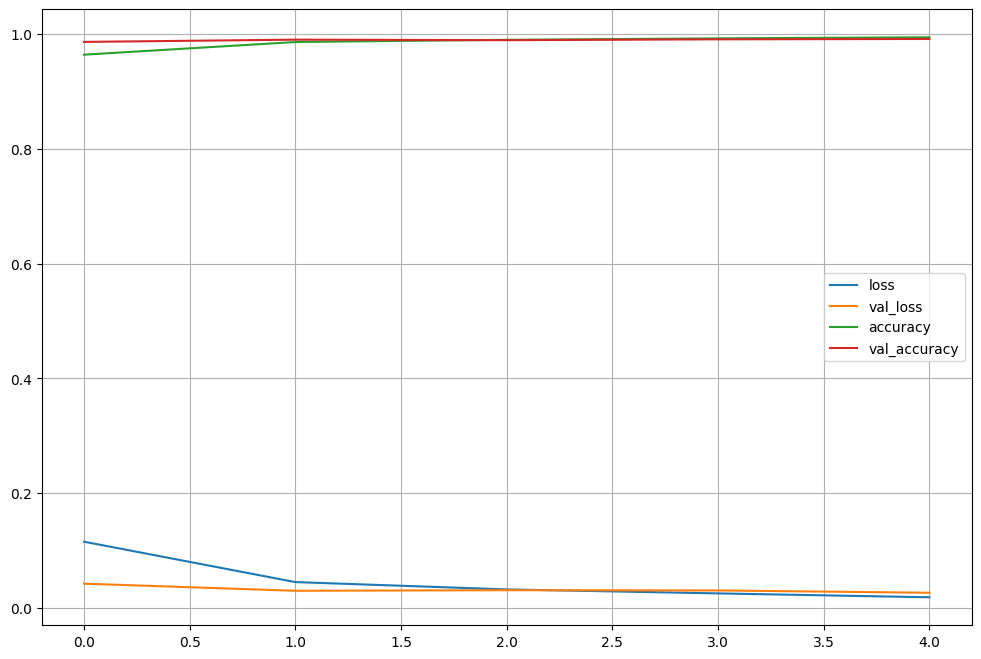

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [8]:
score = model.evaluate(X_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0268 - accuracy: 0.9909
Test loss :  0.026775430887937546
Test accuracy :  0.9908999800682068


In [9]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [10]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

91

In [11]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[4176,
 882,
 9729,
 9540,
 8332,
 6091,
 1530,
 4761,
 947,
 5752,
 445,
 938,
 1414,
 6597,
 2582,
 8527]

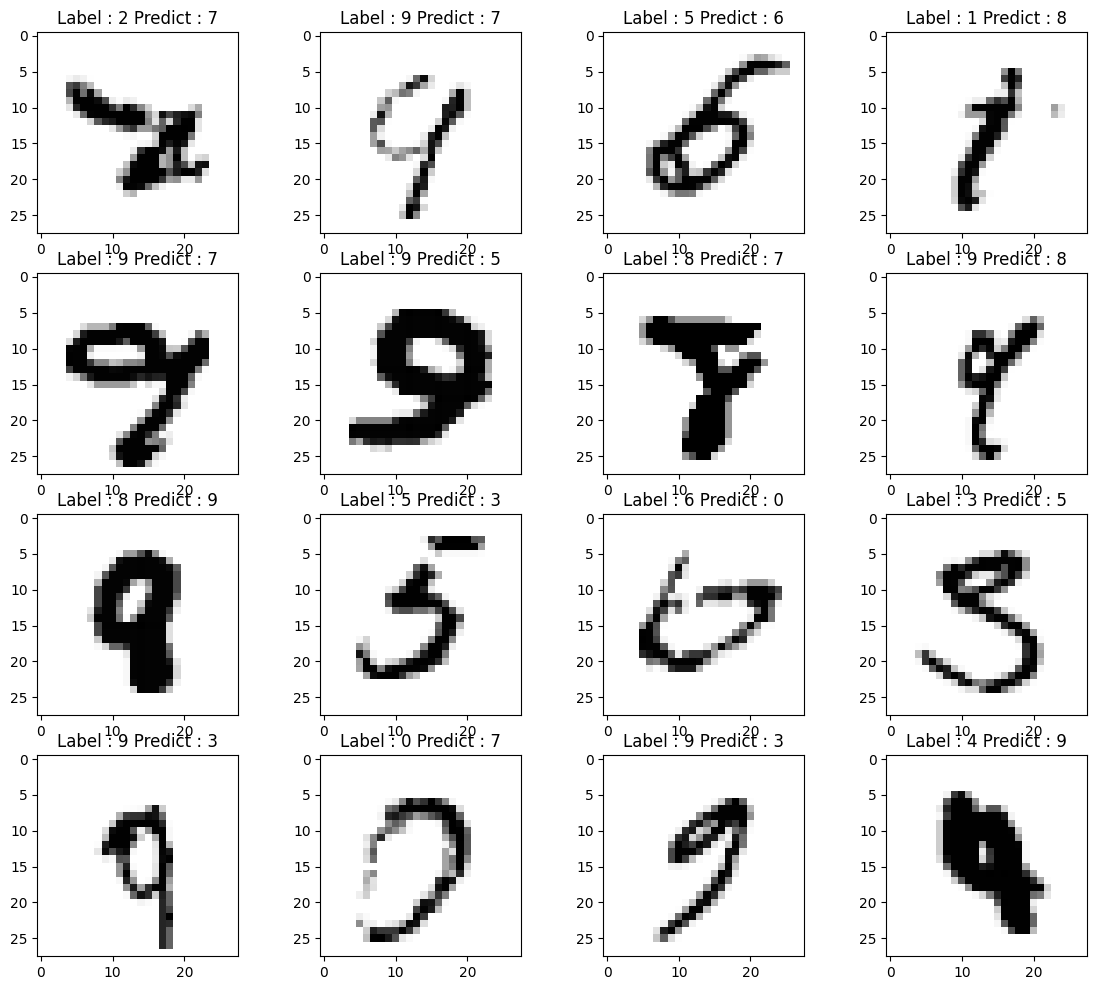

In [12]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis=('off')
    
plt.show()

In [13]:
model.save('MNIST_CNN_model.h5')